
# Diabetes Predication

In [1]:
# Importing Libraries:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

C:\Users\ASUS\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
# for displaying all feature from dataset:
pd.pandas.set_option('display.max_columns', None)

In [3]:
# Reading Dataset:
dataset = pd.read_csv("Diabetes_data.csv")
# Top 5 records:
dataset.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
# Shape of dataset:
dataset.shape

(768, 9)

In [5]:
# Cheaking Missing (NaN) Values:
dataset.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [6]:
# Datatypes:
dataset.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

In [87]:
dataset['DiabetesPedigreeFunction'].value_counts()

0.254    6
0.258    6
0.259    5
0.238    5
0.207    5
        ..
0.886    1
0.804    1
1.251    1
0.382    1
0.375    1
Name: DiabetesPedigreeFunction, Length: 517, dtype: int64

In [55]:
df=dataset.copy()

In [36]:
#df1['Age']=pd.Categorical(df1.Age)


In [37]:
#df1['Outcome']=pd.Categorical(df1.Outcome)


In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    float64
 2   BloodPressure             768 non-null    float64
 3   SkinThickness             768 non-null    float64
 4   Insulin                   768 non-null    float64
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(6), int64(3)
memory usage: 54.1 KB


In [58]:
df['Age'] = df['Age'].replace(['63','64','62','66','67','65','61','69','72','68','70','81','60'],'60-85')

In [59]:
df['Age'] = df['Age'].replace(['51','52','58','57','54','53','55','56','59','50'],"50-60")

In [60]:
df['Age'].value_counts()

22    72
21    63
25    48
24    46
23    38
28    35
26    33
27    32
29    29
31    24
41    22
30    21
37    19
42    18
33    17
32    16
36    16
38    16
45    15
34    14
40    13
43    13
46    13
39    12
35    10
50     8
44     8
51     8
52     8
58     7
47     6
54     6
57     5
60     5
48     5
49     5
53     5
55     4
62     4
63     4
66     4
56     3
59     3
65     3
67     3
61     2
69     2
72     1
64     1
68     1
70     1
81     1
Name: Age, dtype: int64

In [62]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    float64
 2   BloodPressure             768 non-null    float64
 3   SkinThickness             768 non-null    float64
 4   Insulin                   768 non-null    float64
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(6), int64(3)
memory usage: 54.1 KB


In [63]:
df["Outcome"]=df['Outcome'].replace(['0'],'NO')

In [64]:
df["Outcome"]=df['Outcome'].replace(['1'],'Yes')

In [66]:
df['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

In [72]:
df['Outcome_type']=df['Outcome'].astype(str)

In [74]:
df['Age_vary']=df['Age'].astype(str)

In [84]:
dataset.groupby(['Glucose','Age']).count()

Pregnancies  BloodPressure  SkinThickness  Insulin  BMI  \
Glucose Age                                                            
44.0    36             1              1              1        1    1   
56.0    22             1              1              1        1    1   
57.0    41             1              1              1        1    1   
        67             1              1              1        1    1   
61.0    46             1              1              1        1    1   
...                  ...            ...            ...      ...  ...   
197.0   39             1              1              1        1    1   
        53             1              1              1        1    1   
        62             1              1              1        1    1   
198.0   28             1              1              1        1    1   
199.0   22             1              1              1        1    1   

             DiabetesPedigreeFunction  Outcome  
Glucose Age                                     
44.0    36                          1        1  
56.0    22                          1        1  
57.0    41                          1        1  
        67                          1        1  
61.0    46                          1        1  
...                               ...      ...  
197.0   39                          1        1  
        53                          1        1  
        62                          1        1  
198.0   28                          1        1  
199.0   22                          1        1  

[664 rows x 7 columns]

In [76]:
df.drop('Outcome',axis=1,inplace=True)

In [77]:
df.drop('Age',axis=1,inplace=True)

In [78]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    float64
 2   BloodPressure             768 non-null    float64
 3   SkinThickness             768 non-null    float64
 4   Insulin                   768 non-null    float64
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Outcome_type              768 non-null    object 
 8   Age_vary                  768 non-null    object 
dtypes: float64(6), int64(1), object(2)
memory usage: 54.1+ KB


In [79]:
df=df.to_csv('f1.csv')

In [7]:
# Description:
dataset.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


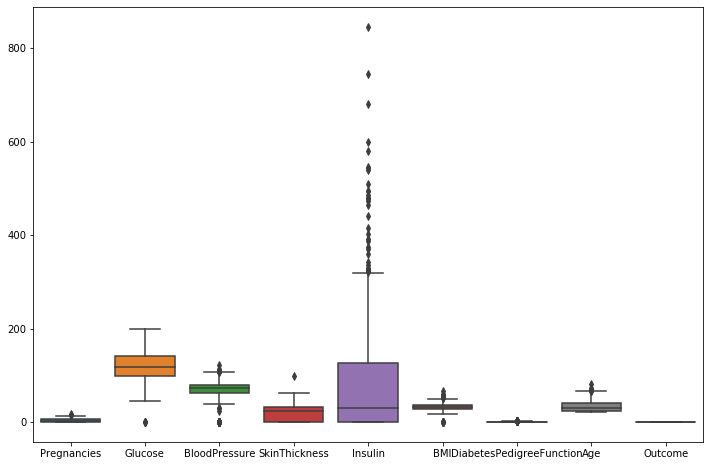

In [8]:
# Boxplot
plt.figure(figsize=(12,8))
sns.boxplot(data=dataset)
plt.show()

- There is Zero value present in **'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI'** feature, we have to replace it.<br>
- We see that their are outliers present in our dataset so we replace zeros with **Median** of respective features.

In [9]:
# Replacing Zero values with Median:
dataset['Glucose'] = np.where(dataset['Glucose']==0, dataset['Glucose'].mean(), dataset['Glucose'])
dataset['BloodPressure'] = np.where(dataset['BloodPressure']==0, dataset['BloodPressure'].mean(), dataset['BloodPressure'])
dataset['SkinThickness'] = np.where(dataset['SkinThickness']==0, dataset['SkinThickness'].mean(), dataset['SkinThickness'])
dataset['Insulin'] = np.where(dataset['Insulin']==0, dataset['Insulin'].mean(), dataset['Insulin'])
dataset['BMI'] = np.where(dataset['BMI']==0, dataset['BMI'].mean(), dataset['BMI'])

In [10]:
# Target feature:
print("Diabetes People     : ", dataset['Outcome'].value_counts()[1])
print("Non-Diabetes People : ", dataset['Outcome'].value_counts()[0])

Diabetes People     :  268
Non-Diabetes People :  500


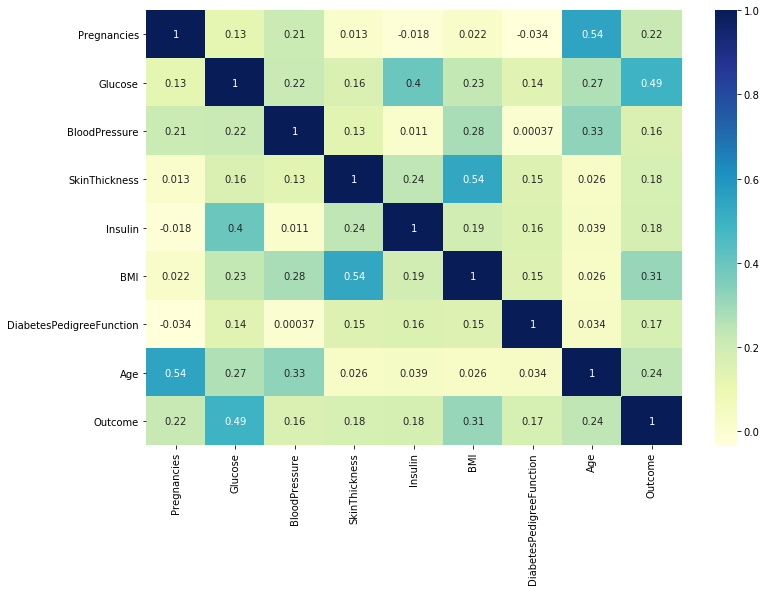

In [11]:
# Correlation using Heatmap:
plt.figure(figsize=(12,8))
sns.heatmap(dataset.corr(), annot=True, cmap='YlGnBu')
plt.show()

#### There is no Multi-Collinearity between two independent feature present in our dataset.

In [38]:
# Independent and Dependent Feature:
X = dataset.iloc[:, :-1]
y = dataset.iloc[:, -1]

In [39]:
# Train Test Split:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.2, random_state=0)

In [40]:
print(X_train.shape)
print(X_test.shape)

(614, 8)
(154, 8)


#### There is no need of Standardization and Normalization of our dataset, as we using Ensemble Technique.

In [41]:
# Importing Performance Metrics:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [42]:
# RandomForestClassifier:
from sklearn.ensemble import RandomForestClassifier
RandomForest = RandomForestClassifier()
RandomForest = RandomForest.fit(X_train,y_train)

# Predictions:
y_pred = RandomForest.predict(X_test)

# Performance:
print('Accuracy:', accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

Accuracy: 0.8116883116883117
[[93 14]
 [15 32]]
              precision    recall  f1-score   support

           0       0.86      0.87      0.87       107
           1       0.70      0.68      0.69        47

    accuracy                           0.81       154
   macro avg       0.78      0.78      0.78       154
weighted avg       0.81      0.81      0.81       154



In [43]:
# AdaBoostClassifier:
from sklearn.ensemble import AdaBoostClassifier
AdaBoost = AdaBoostClassifier()
AdaBoost = AdaBoost.fit(X_train,y_train)

# Predictions:
y_pred = AdaBoost.predict(X_test)

# Performance:
print('Accuracy:', accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

Accuracy: 0.7597402597402597
[[86 21]
 [16 31]]
              precision    recall  f1-score   support

           0       0.84      0.80      0.82       107
           1       0.60      0.66      0.63        47

    accuracy                           0.76       154
   macro avg       0.72      0.73      0.72       154
weighted avg       0.77      0.76      0.76       154



In [44]:
# GradientBoostingClassifier:
from sklearn.ensemble import GradientBoostingClassifier
GradientBoost = GradientBoostingClassifier()
GradientBoost = GradientBoost.fit(X_train,y_train)

# Predictions:
y_pred = GradientBoost.predict(X_test)

# Performance:
print('Accuracy:', accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

Accuracy: 0.7987012987012987
[[91 16]
 [15 32]]
              precision    recall  f1-score   support

           0       0.86      0.85      0.85       107
           1       0.67      0.68      0.67        47

    accuracy                           0.80       154
   macro avg       0.76      0.77      0.76       154
weighted avg       0.80      0.80      0.80       154



In [45]:
# RandomizedSearchCV
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt','log2']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 1000,10)]
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10,14]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4,6,8]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
              'criterion':['entropy','gini']}
print(random_grid)

{'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_features': ['auto', 'sqrt', 'log2'], 'max_depth': [10, 120, 230, 340, 450, 560, 670, 780, 890, 1000], 'min_samples_split': [2, 5, 10, 14], 'min_samples_leaf': [1, 2, 4, 6, 8], 'criterion': ['entropy', 'gini']}


In [46]:
rf = RandomForestClassifier()
rf_randomcv = RandomizedSearchCV(estimator=rf,param_distributions=random_grid,n_iter=100,cv=5,verbose=2,
                               random_state=100,n_jobs=-1)
### fit the randomized model
rf_randomcv.fit(X_train,y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   24.3s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done 349 tasks      | elapsed:  4.4min
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:  6.3min finished


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'criterion': ['entropy', 'gini'],
                                        'max_depth': [10, 120, 230, 340, 450,
                                                      560, 670, 780, 890,
                                                      1000],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': [1, 2, 4, 6, 8],
                                        'min_samples_split': [2, 5, 10, 14],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=100, verbose=2)

In [52]:
rf_randomcv.best_params_

{'n_estimators': 1400,
 'min_samples_split': 10,
 'min_samples_leaf': 8,
 'max_features': 'auto',
 'max_depth': 450,
 'criterion': 'gini'}

In [53]:
best_random_grid=rf_randomcv.best_estimator_

In [48]:
RandomForest = RandomForestClassifier(criterion='gini', n_estimators=1400, max_depth=450, max_features='auto', min_samples_split=10, min_samples_leaf=8)
RandomForest = RandomForest.fit(X_train,y_train)

# Predictions:
y_pred = RandomForest.predict(X_test)

# Performance:
print('Accuracy:', accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

Accuracy: 0.8116883116883117
[[97 10]
 [19 28]]
              precision    recall  f1-score   support

           0       0.84      0.91      0.87       107
           1       0.74      0.60      0.66        47

    accuracy                           0.81       154
   macro avg       0.79      0.75      0.76       154
weighted avg       0.81      0.81      0.81       154



In [55]:
rf_randomcv.best_params_

{'n_estimators': 1400,
 'min_samples_split': 10,
 'min_samples_leaf': 8,
 'max_features': 'auto',
 'max_depth': 450,
 'criterion': 'gini'}

In [61]:
# GridSearchCV
from sklearn.model_selection import GridSearchCV

param_grid = {
    'criterion': [rf_randomcv.best_params_['criterion']],
    'max_depth': [rf_randomcv.best_params_['max_depth']],
    'max_features': [rf_randomcv.best_params_['max_features']],
    'min_samples_leaf': [rf_randomcv.best_params_['min_samples_leaf'],
                         rf_randomcv.best_params_['min_samples_leaf']-1,
                         rf_randomcv.best_params_['min_samples_leaf']-2,
                         rf_randomcv.best_params_['min_samples_leaf']+1, 
                         rf_randomcv.best_params_['min_samples_leaf'] + 2],
    'min_samples_split': [rf_randomcv.best_params_['min_samples_split'] - 2,
                          rf_randomcv.best_params_['min_samples_split'] - 1,
                          rf_randomcv.best_params_['min_samples_split'], 
                          rf_randomcv.best_params_['min_samples_split'] +1,
                          rf_randomcv.best_params_['min_samples_split'] + 2],
    'n_estimators': [rf_randomcv.best_params_['n_estimators'] - 200, rf_randomcv.best_params_['n_estimators'] - 100, 
                     rf_randomcv.best_params_['n_estimators'], 
                     rf_randomcv.best_params_['n_estimators'] + 100, rf_randomcv.best_params_['n_estimators'] + 200]
}

print(param_grid)

#### Fit the grid_search to the data
rf=RandomForestClassifier()
grid_search=GridSearchCV(estimator=rf,param_grid=param_grid,cv=10,n_jobs=-1,verbose=2)
grid_search.fit(X_train,y_train)

{'criterion': ['gini'], 'max_depth': [450], 'max_features': ['auto'], 'min_samples_leaf': [8, 7, 6, 9, 10], 'min_samples_split': [8, 9, 10, 11, 12], 'n_estimators': [1200, 1300, 1400, 1500, 1600]}
Fitting 10 folds for each of 125 candidates, totalling 1250 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   29.5s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:  2.3min
[Parallel(n_jobs=-1)]: Done 349 tasks      | elapsed:  5.3min
[Parallel(n_jobs=-1)]: Done 632 tasks      | elapsed:  9.4min
[Parallel(n_jobs=-1)]: Done 997 tasks      | elapsed: 14.8min
[Parallel(n_jobs=-1)]: Done 1250 out of 1250 | elapsed: 18.5min finished


GridSearchCV(cv=10, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini'], 'max_depth': [450],
                         'max_features': ['auto'],
                         'min_samples_leaf': [8, 7, 6, 9, 10],
                         'min_samples_split': [8, 9, 10, 11, 12],
                         'n_estimators': [1200, 1300, 1400, 1500, 1600]},
             verbose=2)

In [62]:
grid_search.best_estimator_

RandomForestClassifier(max_depth=450, min_samples_leaf=8, min_samples_split=11,
                       n_estimators=1200)

In [71]:
RandomForest_grid = RandomForestClassifier(criterion='gini', n_estimators=1200, max_depth=450, max_features='auto', min_samples_split=10, min_samples_leaf=8)
RandomForest_grid = RandomForest.fit(X_train,y_train)

# Predictions:
y_pred = RandomForest_grid.predict(X_test)

# Performance:
print('Accuracy:', accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

Accuracy: 0.8181818181818182
[[97 10]
 [18 29]]
              precision    recall  f1-score   support

           0       0.84      0.91      0.87       107
           1       0.74      0.62      0.67        47

    accuracy                           0.82       154
   macro avg       0.79      0.76      0.77       154
weighted avg       0.81      0.82      0.81       154

